In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, f1_score

In [ ]:
df = pd.read_csv('after_fe_outlier.csv')

In [ ]:
df.drop(columns=['Month', 'Age', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Annual_Income', 'Occupation', 
                'Total_EMI_per_month', 'Monthly_Inhand_Salary', 
                 'Amount_invested_monthly', 'Payment_Behaviour',  'Monthly_Balance', 'Missed_Payment_Day'], inplace=True)

In [ ]:
df.columns

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount',
       'Credit_Score', 'Credit_History'],
      dtype='object')

In [ ]:
x = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])
    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [ ]:
def feature_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(15,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.gca().invert_yaxis()
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

In [ ]:
def evaluate_f1_score(y_test, y_pred):
    # Calculate F1 score for each class
    f1_scores = f1_score(y_test, y_pred, average=None)
    print("F1 score for each class:", f1_scores)

    # Calculate and print macro-average F1 score
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    print("Macro-average F1 score:", macro_f1)

    # Calculate and print weighted-average F1 score
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    print("Weighted-average F1 score:", weighted_f1)

    return f1_scores, macro_f1, weighted_f1

In [ ]:
features = df.drop(['Credit_Score'] , axis = 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [ ]:
rf = RandomForestClassifier(max_depth=12)
rf.fit(x_train , y_train)
rf_score_train=rf.score(x_train , y_train)
rf_score_test=rf.score(x_test , y_test)

In [ ]:
rf_score_train

0.7778

In [ ]:
rf_score_test

0.7480666666666667

Training Accuracy RandomForestClassifier 77.78  Test Accuracy RandomForestClassifier 74.80666666666667


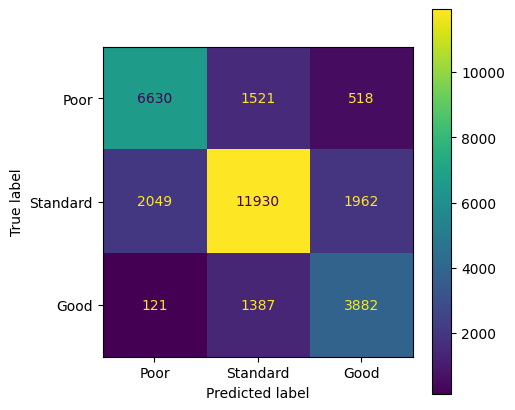

In [ ]:
evaluate_classification(rf, "RandomForestClassifier", x_train,x_test,y_train,y_test)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
rf_f1_scores, rf_macro_f1, rf_weighted_f1 = evaluate_f1_score(y_test, y_pred)

F1 score for each class: [0.7590589  0.77520387 0.66065351]
Macro-average F1 score: 0.7316387609671614
Weighted-average F1 score: 0.7499576324595388


In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(20).T

,13504,72599,42217,97650,99120,13165,56244,72729,10979,11794,30261,27441,82623,51042,92194,91810,13266,48317,64118,31116
Y_test,-1,0,-1,1,0,0,0,0,0,0,-1,1,1,-1,0,0,-1,-1,0,-1
Y_pred,-1,0,0,1,0,0,0,0,1,0,-1,1,1,-1,0,0,-1,-1,0,-1


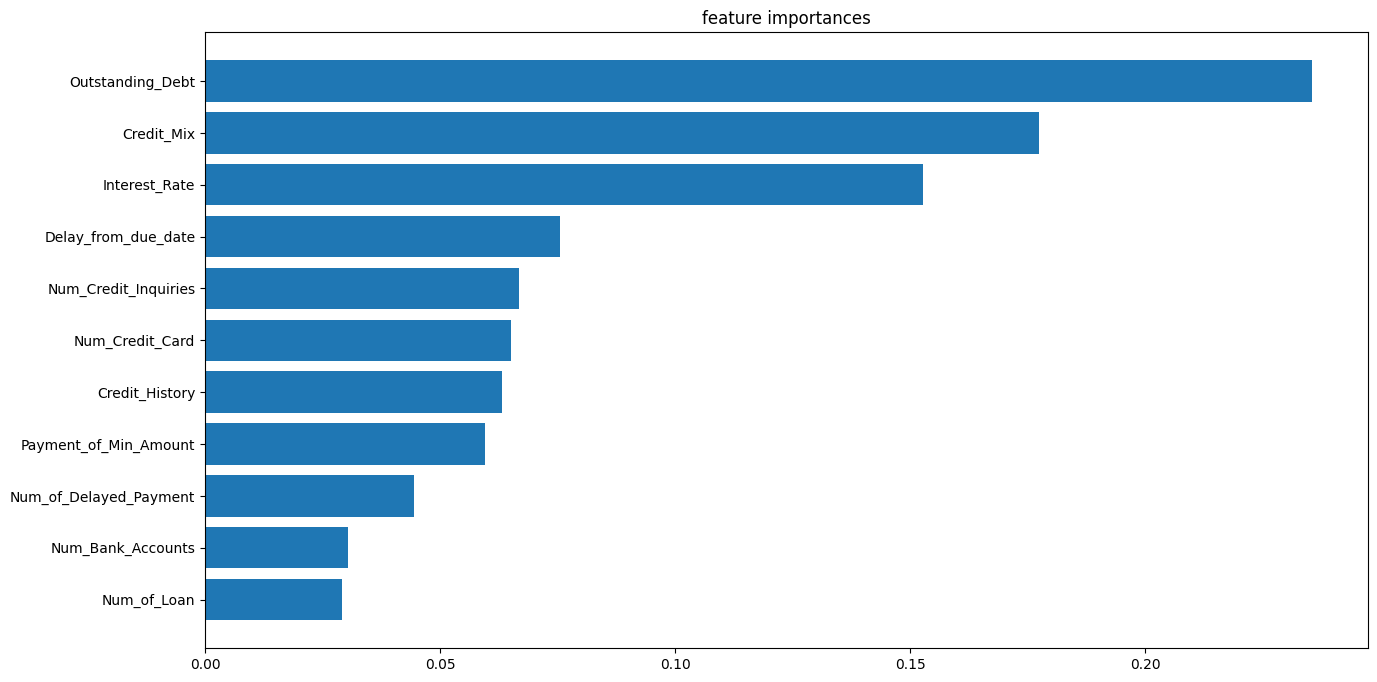

In [ ]:
feature_importances(abs(rf.feature_importances_), features)

In [ ]:
pickle.dump(rf, open('rf.obj', 'wb'))
pickle.dump(scaler, open('scaler.obj', 'wb'))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=762520ba-b8cf-4151-96d5-65e8763600e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>